<a href="https://colab.research.google.com/github/dilaraozcerit/Machine-Learning/blob/main/Heart_Stroke_Prediction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
import sklearn
sklearn.metrics.SCORERS.keys()
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from scipy.special import expit, logit

# Ingest the data to notebook

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [ ]:
df.shape

(303, 14)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


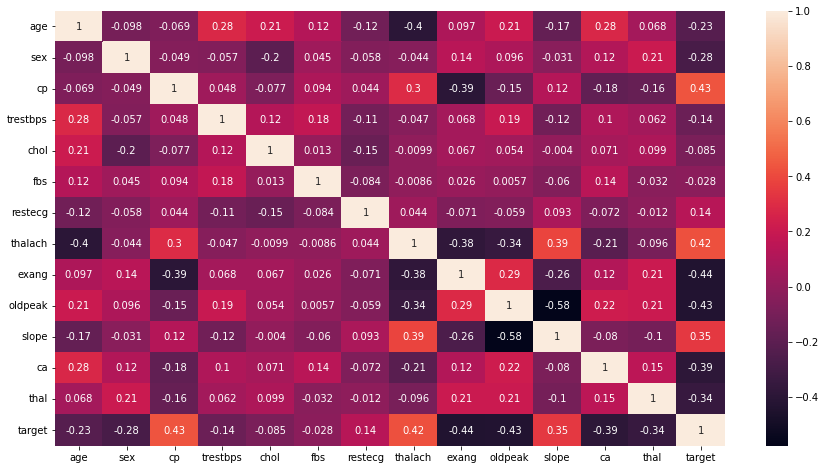

In [ ]:
sns.heatmap(df.corr(), annot=True);


In [ ]:
#multicollinearity control
df_numeric = df.select_dtypes(include ="number")
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

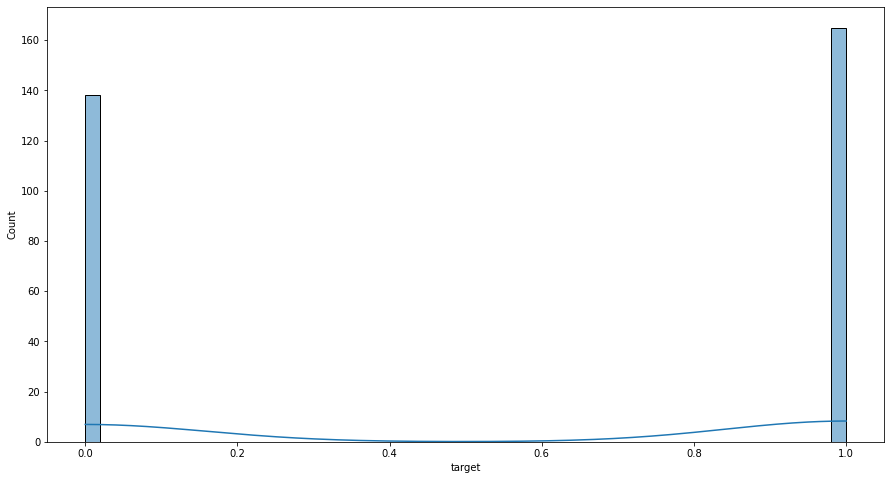

In [ ]:
sns.histplot(df.target, bins = 50, kde= True)

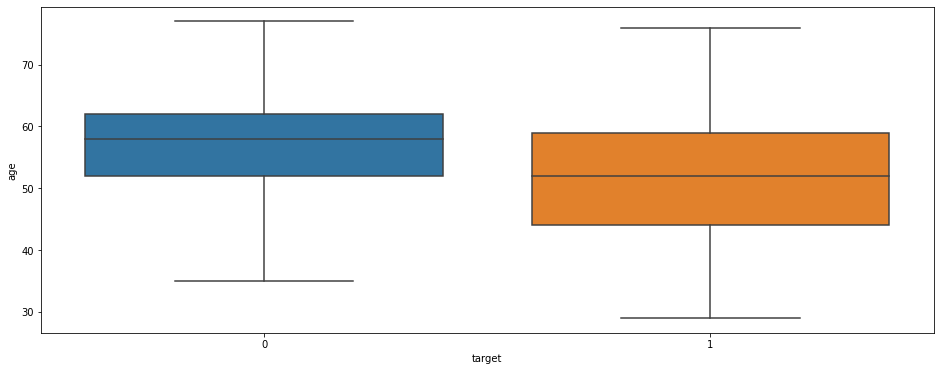

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="target", y="age", data=df, whis=3)
plt.show()

In [ ]:
corr_by_target = df.corr()["target"].sort_values()[:-1]
corr_by_target

exang      -0.437
oldpeak    -0.431
ca         -0.392
thal       -0.344
sex        -0.281
age        -0.225
trestbps   -0.145
chol       -0.085
fbs        -0.028
restecg     0.137
slope       0.346
thalach     0.422
cp          0.434
Name: target, dtype: float64

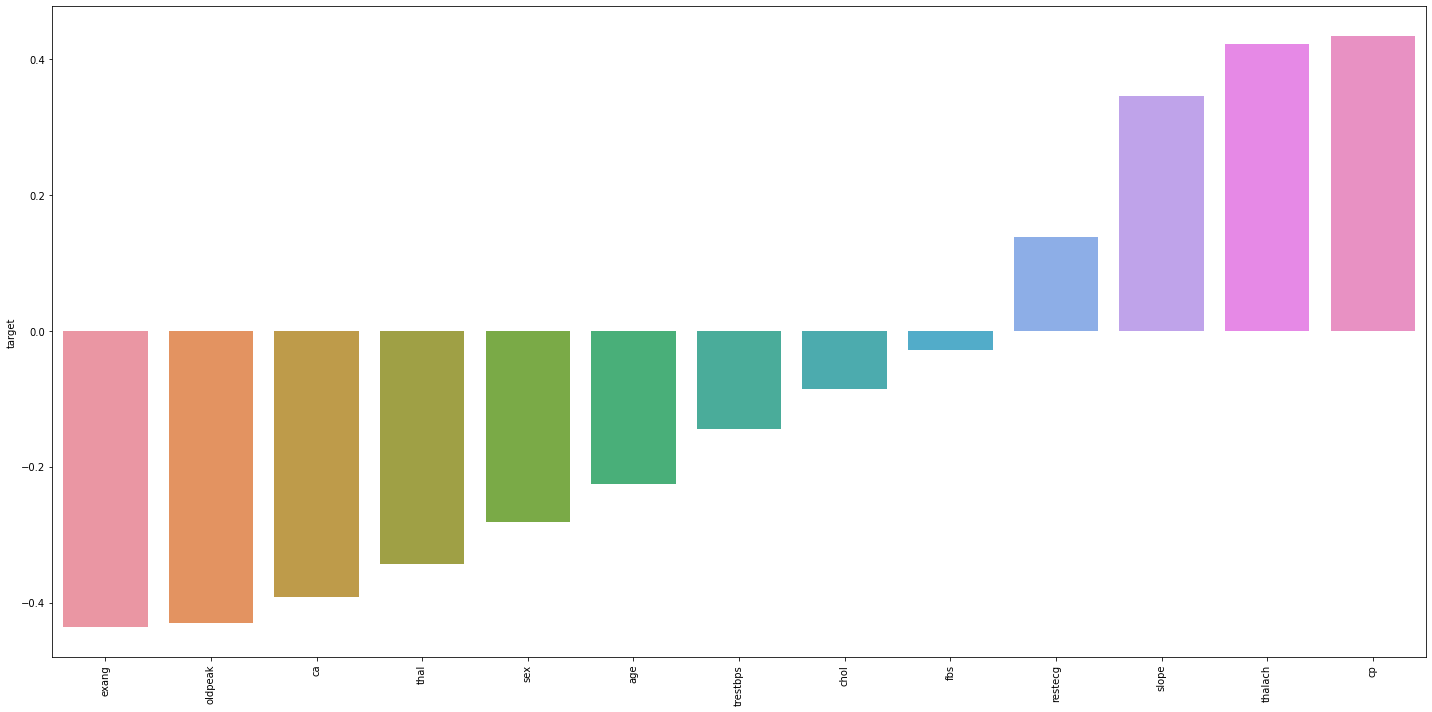

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_target.index, y = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout();

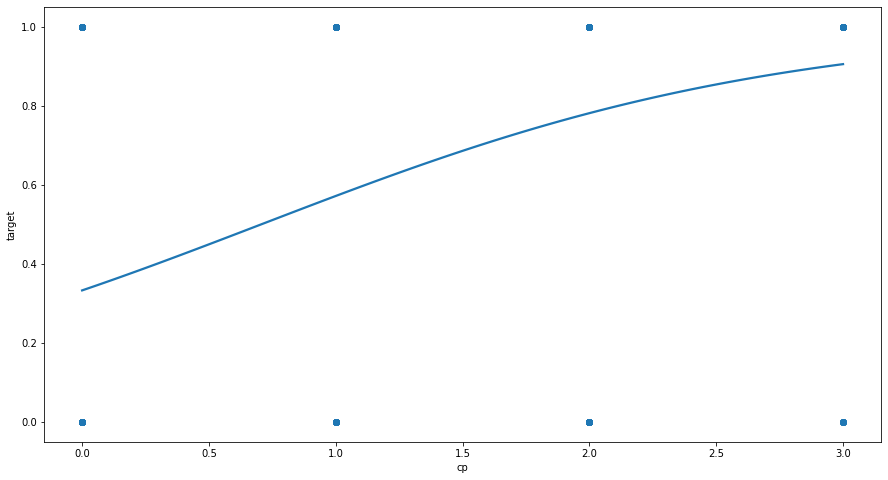

In [ ]:
sns.regplot(x=df['cp'], y = df['target'], data=df, logistic=True, ci=None)

In [ ]:
df = pd.get_dummies(df, columns = ["cp","restecg","slope","thal"], drop_first=True)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302
age,63.000,37.000,41.000,56.000,57.000,57.000,56.000,44.000,52.000,57.000,54.000,48.000,49.000,64.000,58.000,50.000,58.000,66.000,43.000,69.000,59.000,44.000,42.000,61.000,40.000,71.000,59.000,51.000,65.000,53.000,41.000,65.000,44.000,54.000,51.000,46.000,54.000,54.000,65.000,65.000,...,63.000,54.000,66.000,55.000,49.000,54.000,56.000,46.000,61.000,67.000,58.000,47.000,52.000,58.000,57.000,58.000,61.000,42.000,52.000,59.000,40.000,61.000,46.000,59.000,57.000,57.000,55.000,61.000,58.000,58.000,67.000,44.000,63.000,63.000,59.000,57.000,45.000,68.000,57.000,57.000
sex,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000
trestbps,145.000,130.000,130.000,120.000,120.000,140.000,140.000,120.000,172.000,150.000,140.000,130.000,130.000,110.000,150.000,120.000,120.000,150.000,150.000,140.000,135.000,130.000,140.000,150.000,140.000,160.000,150.000,110.000,140.000,130.000,105.000,120.000,130.000,125.000,125.000,142.000,135.000,150.000,155.000,160.000,...,108.000,110.000,112.000,180.000,118.000,122.000,130.000,120.000,134.000,120.000,100.000,110.000,125.000,146.000,124.000,136.000,138.000,136.000,128.000,126.000,152.000,140.000,140.000,134.000,154.000,110.000,128.000,148.000,114.000,170.000,152.000,120.000,140.000,124.000,164.000,140.000,110.000,144.000,130.000,130.000
chol,233.000,250.000,204.000,236.000,354.000,192.000,294.000,263.000,199.000,168.000,239.000,275.000,266.000,211.000,283.000,219.000,340.000,226.000,247.000,239.000,234.000,233.000,226.000,243.000,199.000,302.000,212.000,175.000,417.000,197.000,198.000,177.000,219.000,273.000,213.000,177.000,304.000,232.000,269.000,360.000,...,269.000,206.000,212.000,327.000,149.000,286.000,283.000,249.000,234.000,237.000,234.000,275.000,212.000,218.000,261.000,319.000,166.000,315.000,204.000,218.000,223.000,207.000,311.000,204.000,232.000,335.000,205.000,203.000,318.000,225.000,212.000,169.000,187.000,197.000,176.000,241.000,264.000,193.000,131.000,236.000
fbs,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
thalach,150.000,187.000,172.000,178.000,163.000,148.000,153.000,173.000,162.000,174.000,160.000,139.000,171.000,144.000,162.000,158.000,172.000,114.000,171.000,151.000,161.000,179.000,178.000,137.000,178.000,162.000,157.000,123.000,157.000,152.000,168.000,140.000,188.000,152.000,125.000,160.000,170.000,165.000,148.000,151.000,...,169.000,108.000,132.000,117.000,126.000,116.000,103.000,144.000,145.000,71.000,156.000,118.000,168.000,105.000,141.000,152.000,125.000,125.000,156.000,134.000,181.000,138.000,120.000,162.000,164.000,143.000,130.000,161.000,140.000,146.000,150.000,144.000,144.000,136.000,90.000,123.000,132.000,141.000,115.000,174.000
exang,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0

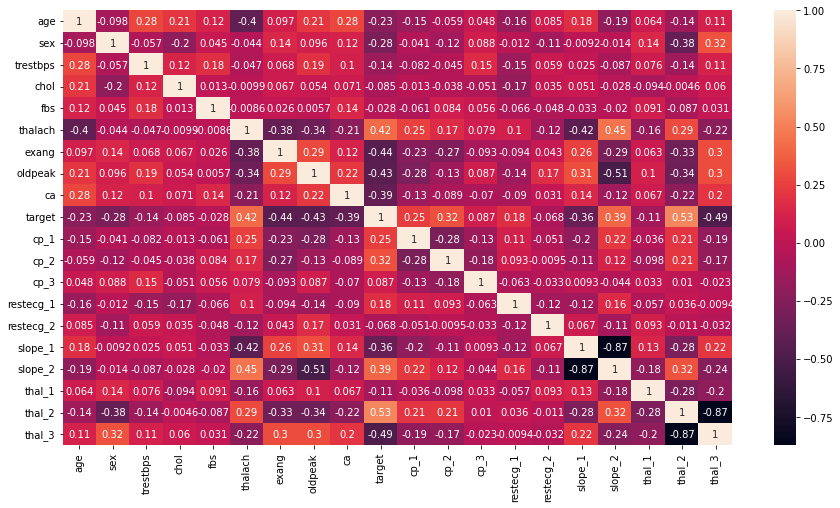

In [ ]:
sns.heatmap(df.corr(), annot=True);

# Data Preprocessing

In [ ]:
X = df.drop(columns='target')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
log_model.coef_

array([[-0.04137202, -0.70634993, -0.28288606, -0.02037538, -0.04720892,
         0.50641009, -0.17205834, -0.61460724, -0.87194758,  0.23860938,
         0.86219034,  0.57411059,  0.32046452, -0.00375792, -0.66186267,
        -0.23527876,  0.34207387,  0.4174011 , -0.19793262]])

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.00879604, 0.99120396],
       [0.10341987, 0.89658013],
       [0.01281687, 0.98718313],
       [0.82599688, 0.17400312],
       [0.9201477 , 0.0798523 ],
       [0.89299899, 0.10700101],
       [0.31340765, 0.68659235],
       [0.02890418, 0.97109582],
       [0.6763204 , 0.3236796 ],
       [0.03554607, 0.96445393],
       [0.09426991, 0.90573009],
       [0.99253599, 0.00746401],
       [0.95203229, 0.04796771],
       [0.21800786, 0.78199214],
       [0.03517747, 0.96482253],
       [0.51580102, 0.48419898],
       [0.06223133, 0.93776867],
       [0.37443457, 0.62556543],
       [0.62595868, 0.37404132],
       [0.99266417, 0.00733583],
       [0.00409454, 0.99590546],
       [0.98881398, 0.01118602],
       [0.41102959, 0.58897041],
       [0.95314758, 0.04685242],
       [0.98883555, 0.01116445],
       [0.1453395 , 0.8546605 ],
       [0.99306101, 0.00693899],
       [0.0937763 , 0.9062237 ],
       [0.17412501, 0.82587499],
       [0.9969766 , 0.0030234 ],
       [0.

In [ ]:
accuracy_score(y_test,y_pred)

0.8421052631578947

In [ ]:
precision_score(y_test, y_pred)

0.8043478260869565

In [ ]:
recall_score(y_test, y_pred)

0.925

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.93      0.86        40

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [ ]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       102
           1       0.85      0.90      0.88       125

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.015,0.007,0.957,1.000,0.917,0.957
2,0.013,0.006,0.783,0.818,0.750,0.783
3,0.012,0.008,0.783,0.786,0.846,0.815
4,0.014,0.008,0.783,0.750,0.923,0.828
5,0.013,0.008,0.652,0.667,0.769,0.714
6,0.009,0.003,0.826,0.846,0.846,0.846
7,0.005,0.003,0.870,0.857,0.923,0.889
8,0.005,0.003,0.909,0.857,1.000,0.923
9,0.006,0.003,0.818,0.750,1.000,0.857
10,0.007,0.003,0.909,0.917,0.917,0.917


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.829
test_precision   0.825
test_recall      0.889
test_f1          0.853
dtype: float64

In [ ]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.93      0.86        40

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76

Train Set

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       102
           1       0.85      0.90      0.88       125

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



Grid Search

# Implement KNN and Evaluate

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [ ]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.000,1.000
1,0.000,1.000
2,0.200,0.800
3,0.800,0.200
4,0.800,0.200
...,...,...
71,0.600,0.400
72,0.800,0.200
73,0.000,1.000
74,0.200,0.800


In [ ]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
213,0,0,0.000,1.000
168,0,0,0.000,1.000
275,0,0,0.200,0.800
164,1,1,0.800,0.200
55,1,1,1.000,0.000
204,0,0,0.000,1.000
2,1,1,1.000,0.000
246,0,0,0.000,1.000
182,0,1,1.000,0.000
185,0,1,0.600,0.400


# Visually compare models based on your chosen metric

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  9],
       [ 3, 37]])

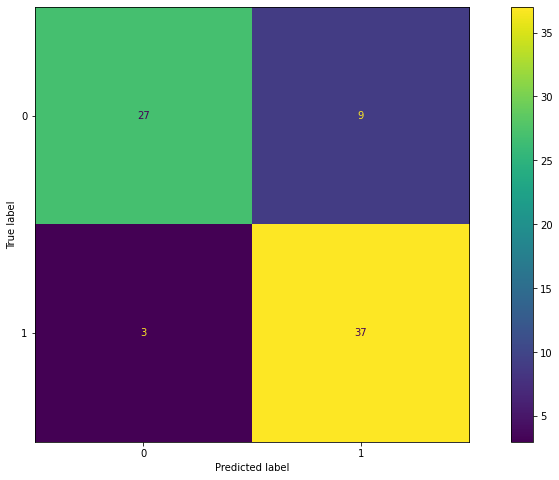

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  9]
 [ 3 37]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.93      0.86        40

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



Elbow Method for Choosing Reasonable K Values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

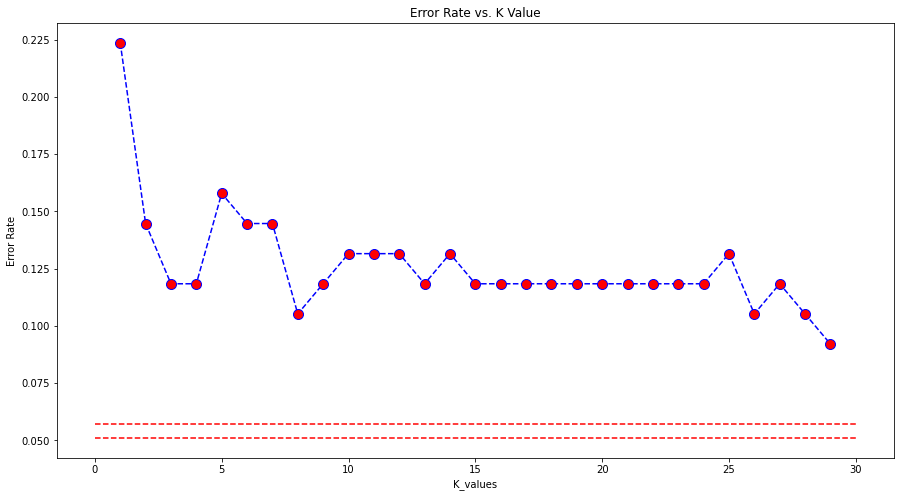

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[29  7]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.84      0.95      0.89        40

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76


Train_Set

[[ 84  18]
 [ 23 102]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       102
           1       0.85      0.82      0.83       125

    accuracy                           0.82       227
   macro avg       0.82      0.82      0.82       227
weighted avg       0.82      0.82      0.82       227



In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train_scaled,y_train)
print('WITH K=29\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[30  6]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.87      0.97      0.92        40

    accuracy                           0.91        76
   macro avg       0.92      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76


Train_Set

[[ 80  22]
 [ 20 105]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.83      0.84      0.83       125

    accuracy                           0.81       227
   macro avg       0.81      0.81      0.81       227
weighted avg       0.81      0.81      0.81       227



Cross Validate

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.007,0.870,1.000,0.750,0.857
2,0.001,0.007,0.783,0.818,0.750,0.783
3,0.001,0.007,0.913,1.000,0.846,0.917
4,0.001,0.008,0.783,0.786,0.846,0.815
5,0.002,0.010,0.696,0.750,0.692,0.720
6,0.001,0.006,0.826,0.846,0.846,0.846
7,0.001,0.004,0.696,0.800,0.615,0.696
8,0.001,0.004,0.864,0.800,1.000,0.889
9,0.001,0.004,0.818,0.750,1.000,0.857
10,0.001,0.004,0.818,0.833,0.833,0.833


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.807
test_precision   0.838
test_recall      0.818
test_f1          0.821
dtype: float64

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values= range(1,30)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'f1')

In [ ]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 16, 'p': 2, 'weights': 'distance'}

In [ ]:

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) # cv'siz hali

Test_Set

[[30  6]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.87      0.97      0.92        40

    accuracy                           0.91        76
   macro avg       0.92      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76


Train_Set

[[ 80  22]
 [ 20 105]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.83      0.84      0.83       125

    accuracy                           0.81       227
   macro avg       0.81      0.81      0.81       227
weighted avg       0.81      0.81      0.81       227



In [ ]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test) # cv'li hali

Test_Set

[[29  7]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.84      0.95      0.89        40

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76


Train_Set

[[102   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       125

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



ROC curves and AUC

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

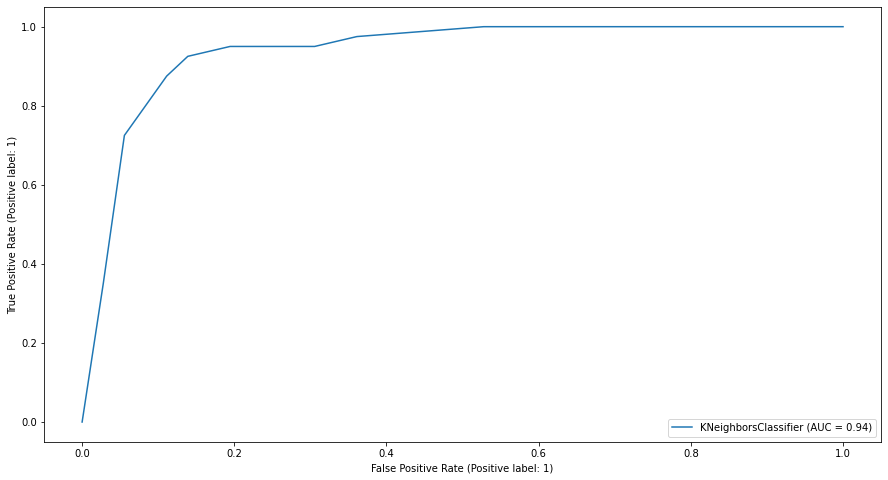

In [ ]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9371527777777777

# Chose best model and make a random prediction 

In [ ]:
scaler = StandardScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)

In [ ]:
final_knn_model = KNeighborsClassifier(n_neighbors=29)

In [ ]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

In [ ]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [ ]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [ ]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.300,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,0,1,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,1,1,0,1,0,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,0,1,0,1,0,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,0,1,0,1,0,0,0,1


In [650]:
new_obs = {"age":[57],"sex":1,"trestbps":130,"chol":204,"fbs":1,"thalach":168,"exang":1,	"oldpeak":1200,	"ca":0,	"target":1,	"cp_1":0,	"cp_2":0,
           "restecg_1":0,	"restecg_2":1,	"slope_1":0,	"slope_2":1,	"thal_1":0,	"thal_2":1,	"thal_3":0}

In [651]:
new_obs=new_obs = {'age': list(np.random.randint(8,70,10)),
           'sex': list(np.random.randint(0,2,10)),
           'trestbps' : list(np.random.randint(70,140,10)),
           'chol' : list(np.random.randint(120,270,10)),
           'fbs' : list(np.random.randint(0,2,10)),
           'thalach' : list(np.random.randint(70,200,10)),
           'exang' : list(np.random.randint(0,2,10)),
           'oldpeak' : list(np.random.uniform(0,7,10)),
           'ca' : list(np.random.randint(0,5,10)),
           'cp_1' : [1,0,1,0,0,0,1,1,0,0],
           'cp_2' : [0,1,0,0,1,0,0,0,0,1],
           'cp_3' : [0,0,0,1,0,1,0,0,1,0],
           'restecg_1' : [0,0,1,0,1,0,0,1,0,1],
           'restecg_2' : [1,0,0,0,0,1,1,0,1,0],
           'slope_1' : [1,1,0,1,0,0,0,1,0,1],
           'slope_2' : [0,0,1,0,1,1,1,0,1,0],
           'thal_1' :  [0,1,0,0,1,1,0,0,0,1],
           'thal_2' :  [0,0,1,0,0,0,1,0,1,0],
           'thal_3' :  [1,0,0,1,0,0,0,1,0,0]
           }

In [649]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,29,1,103,184,0,191,1,2.170,3,1,0,0,0,1,1,0,0,0,1
1,14,1,73,149,0,136,1,3.944,1,0,1,0,0,0,1,0,1,0,0
2,53,0,130,246,1,187,1,6.044,0,1,0,0,1,0,0,1,0,1,0
3,10,1,120,177,1,75,1,3.918,2,0,0,1,0,0,1,0,0,0,1
4,25,1,134,162,1,141,0,3.804,1,0,1,0,1,0,0,1,1,0,0
5,37,1,99,154,1,113,1,3.663,4,0,0,1,0,1,0,1,1,0,0
6,61,0,107,214,1,173,0,6.233,1,1,0,0,0,1,0,1,0,1,0
7,26,0,74,230,1,192,0,5.160,2,1,0,0,1,0,1,0,0,0,1
8,59,1,129,246,1,167,0,3.625,4,0,0,1,0,1,0,1,0,1,0
9,52,1,81,161,1,85,1,6.891,2,0,1,0,1,0,1,0,1,0,0


In [652]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.79762350e+00,  6.81005225e-01, -1.63478618e+00,
        -1.20328234e+00, -4.17634535e-01,  1.80839349e+00,
         1.43548113e+00,  9.75420098e-01,  2.22410436e+00,
         2.24944438e+00, -6.34647759e-01, -2.86605752e-01,
        -1.00330579e+00,  8.64580823e+00,  1.07902072e+00,
        -9.39141937e-01, -2.51312345e-01, -1.10076284e+00,
         1.26085034e+00],
       [-4.45195590e+00,  6.81005225e-01, -3.34817329e+00,
        -1.87967422e+00, -4.17634535e-01, -5.96784283e-01,
         1.43548113e+00,  2.50576295e+00,  2.65082205e-01,
        -4.44554224e-01,  1.57567719e+00, -2.86605752e-01,
        -1.00330579e+00, -1.15662986e-01,  1.07902072e+00,
        -9.39141937e-01,  3.97911213e+00, -1.10076284e+00,
        -7.93115539e-01],
       [-1.50691664e-01, -1.46841752e+00, -9.27377842e-02,
        -5.10243757e-03,  2.39443800e+00,  1.63347147e+00,
         1.43548113e+00,  4.31692987e+00, -7.14428871e-01,
         2.24944438e+00, -6.34647759e-01, -2.86605752e-01,
    

In [653]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [654]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=29)

In [655]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [656]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,29,1,103,184,0,191,1,2.170,3,1,0,0,0,1,1,0,0,0,1,0,0.207,0.793
1,14,1,73,149,0,136,1,3.944,1,0,1,0,0,0,1,0,1,0,0,0,0.345,0.655
2,53,0,130,246,1,187,1,6.044,0,1,0,0,1,0,0,1,0,1,0,1,0.690,0.310
3,10,1,120,177,1,75,1,3.918,2,0,0,1,0,0,1,0,0,0,1,0,0.138,0.862
4,25,1,134,162,1,141,0,3.804,1,0,1,0,1,0,0,1,1,0,0,1,0.690,0.310
5,37,1,99,154,1,113,1,3.663,4,0,0,1,0,1,0,1,1,0,0,0,0.241,0.759
6,61,0,107,214,1,173,0,6.233,1,1,0,0,0,1,0,1,0,1,0,1,0.655,0.345
7,26,0,74,230,1,192,0,5.160,2,1,0,0,1,0,1,0,0,0,1,1,0.552,0.448
8,59,1,129,246,1,167,0,3.625,4,0,0,1,0,1,0,1,0,1,0,0,0.414,0.586
9,52,1,81,161,1,85,1,6.891,2,0,1,0,1,0,1,0,1,0,0,0,0.103,0.897
